In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 10 # you can increase it to 20,50,70, 100
optimizer = Adam()
verbosity = 1
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [ ]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')
# Normalize data
input_train = input_train / 255
input_test = input_test / 255
 # Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss=loss_function, optimizer=optimizer,metrics=['accuracy'])

# Fit data to model (this will take little time to train)
history = model.fit(input_train, target_train, batch_size=batch_size, epochs=no_epochs, verbose=verbosity)

Epoch 1/10
1000/1000 [==============================] - 67s 65ms/step - loss: 1.5632 - accuracy: 0.4356
Epoch 2/10
1000/1000 [==============================] - 64s 64ms/step - loss: 1.1356 - accuracy: 0.5966
Epoch 3/10
1000/1000 [==============================] - 64s 64ms/step - loss: 0.9667 - accuracy: 0.6613
Epoch 4/10
1000/1000 [==============================] - 63s 63ms/step - loss: 0.8477 - accuracy: 0.7020
Epoch 5/10
1000/1000 [==============================] - 63s 63ms/step - loss: 0.7489 - accuracy: 0.7399
Epoch 6/10
1000/1000 [==============================] - 63s 63ms/step - loss: 0.6607 - accuracy: 0.7676
Epoch 7/10
1000/1000 [==============================] - 63s 63ms/step - loss: 0.5770 - accuracy: 0.7970
Epoch 8/10
1000/1000 [==============================] - 63s 63ms/step - loss: 0.5095 - accuracy: 0.8201
Epoch 9/10
1000/1000 [==============================] - 63s 63ms/step - loss: 0.4347 - accuracy: 0.8478
Epoch 10/10
1000/1000 [==============================] - 66s 66m

In [ ]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.0196887254714966 / Test accuracy: 0.708899974822998


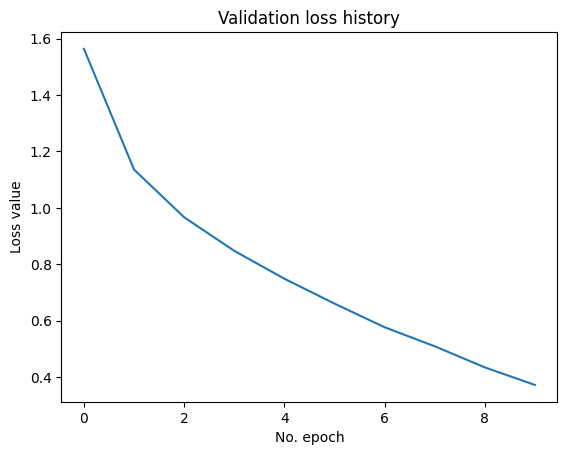

In [ ]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

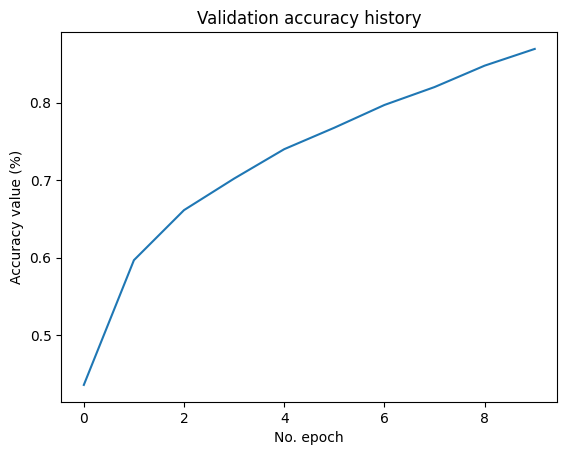

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 5

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

# Define the model architecture
 model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

# Generate a print
print('------------------------------------------------------------------------------------------------------')
print(f'Training for fold {fold_no} ...')

# Fit data to model
history = model.fit(inputs[train], targets[train], batch_size=batch_size,epochs=no_epochs, verbose=verbosity)

# Generate generalization metrics
scores = model.evaluate(inputs[test], targets[test], verbose=0)
print(f'Score for fold {fold_no}: {model.metrics_names[0]} of{scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
acc_per_fold.append(scores[1] * 100)
loss_per_fold.append(scores[0])
# Increase fold number
fold_no = fold_no + 1


------------------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
960/960 [==============================] - 68s 70ms/step - loss: 1.5649 - accuracy: 0.4390
Epoch 2/10
960/960 [==============================] - 62s 65ms/step - loss: 1.1545 - accuracy: 0.5924
Epoch 3/10
960/960 [==============================] - 61s 63ms/step - loss: 0.9929 - accuracy: 0.6498
Epoch 4/10
960/960 [==============================] - 60s 63ms/step - loss: 0.8679 - accuracy: 0.6953
Epoch 5/10
960/960 [==============================] - 61s 63ms/step - loss: 0.7714 - accuracy: 0.7304
Epoch 6/10
960/960 [==============================] - 61s 63ms/step - loss: 0.6866 - accuracy: 0.7598
Epoch 7/10
960/960 [==============================] - 60s 63ms/step - loss: 0.6006 - accuracy: 0.7916
Epoch 8/10
960/960 [==============================] - 60s 63ms/step - loss: 0.5196 - accuracy: 0.8166
Epoch 9/10
960/960 [==============================] - 63s

In [ ]:
# == Provide average scores ==
print('----------------------------------------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
 print('---------------------------------------------------------------------------------------------------------')
 print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy:{acc_per_fold[i]}%')
print('----------------------------------------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('-----------------------------------------------------------------------------------------------------------')